In [1]:
from random import random
from math import exp
import numpy as np

def Pb0(t,b0,b1): return (b1-t)/(b1-b0)
def Pb1(t,b0,b1): return (t-b0)/(b1-b0)
def G(t,s,b0,b1): return -(b1-s)*(t-b0)/(b1-b0) if t<s else - (b1-t)*(s-b0)/(b1-b0) 

def Y(t,y0,y1,b0,b1): 
    sol = Pb0(t,b0,b1)*y0 + Pb1(t,b0,b1)*y1
    l = 2 # russian roulette rate
    if random()*l<1: 
        S = b0+random()*(b1-b0)
        sol += l*G(t,S,b0,b1) * Y(S,y0,y1,b0,b1)*(b1-b0)
    return sol 
    
def soltest(t,y0,y1,b0,b1,nsim): return sum(Y(t,y0,y1,b0,b1) for _ in range(nsim))/nsim

nsim = 10**2
B0 = np.arange(-1,0,0.2)
B1 = np.arange(1,0,-0.2)
T = [b0+(b1-b0)*random() for b0,b1 in zip(B0,B1) ]

for t,b0,b1 in zip(T,B0,B1):
    print((soltest(t,exp(b0),exp(b1),b0,b1,nsim)-exp(t))/exp(t))

-0.11611271379450594
0.017338620155783243
-0.03035618746659506
-0.00012532082982273643
-0.0008444865260153166


0.5
0.9942513905318492


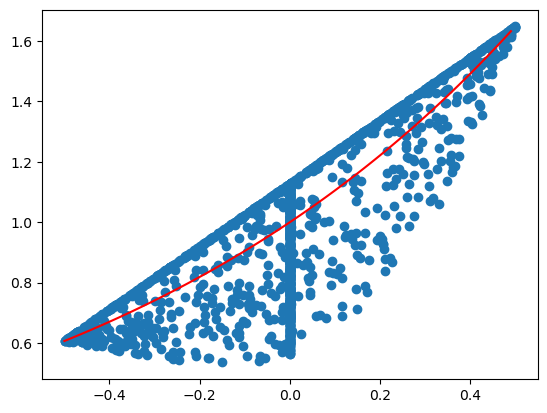

1
1.0297028154092736


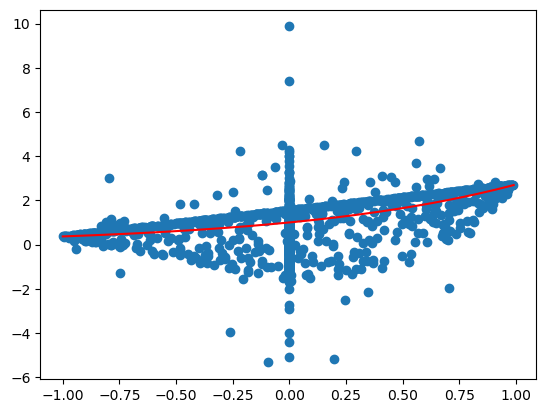

1.1
1.0214415870367515


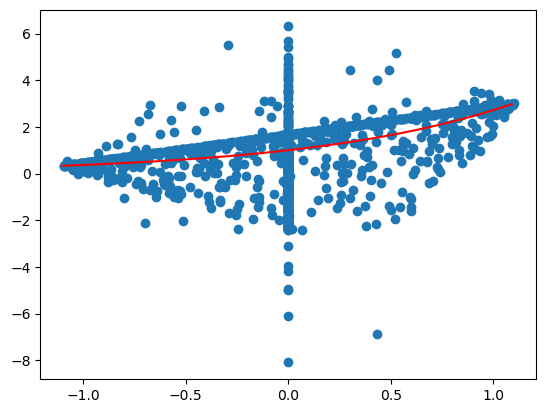

1.2
0.8319053885898093


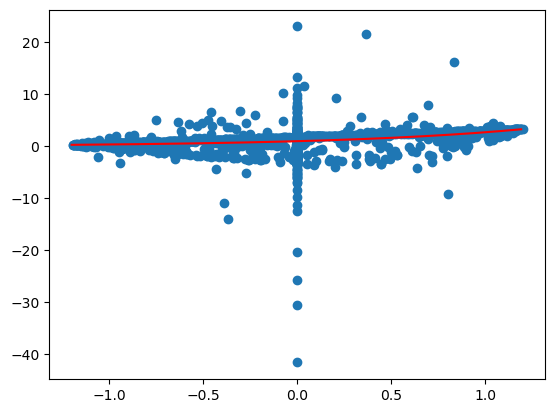

1.5
-2.9698517118869607


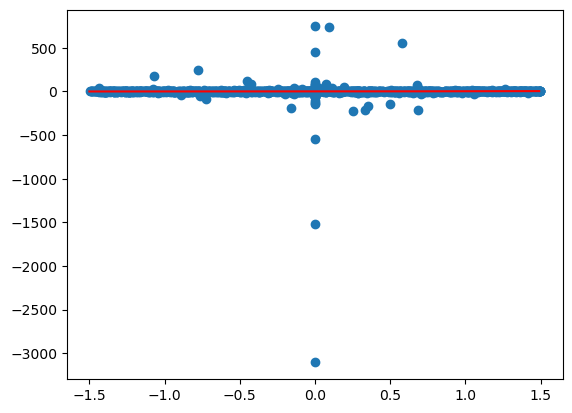

2
-1134.7862404602927


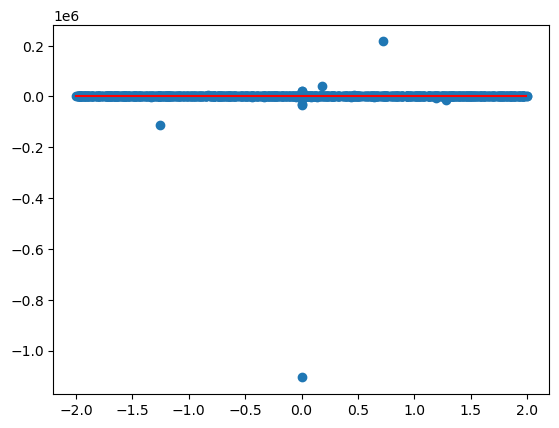

In [36]:
from random import random
from math import exp
import numpy as np
import matplotlib.pyplot as plt

def Pb0(t,b0,b1): return (b1-t)/(b1-b0)
def Pb1(t,b0,b1): return (t-b0)/(b1-b0)
def G(t,s,b0,b1): return -(b1-s)*(t-b0)/(b1-b0) if t<s else - (b1-t)*(s-b0)/(b1-b0) 

def pltaa(t,y0,y1,b0,b1):
    points = []
    def Y(t,y0,y1,b0,b1): 
        sol = Pb0(t,b0,b1)*y0 + Pb1(t,b0,b1)*y1
        l = 2 # russian roulette rate
        if random()*l<1: 
            S = b0+random()*(b1-b0)
            sol += l*G(t,S,b0,b1) * Y(S,y0,y1,b0,b1)*(b1-b0)
        points.append((t,sol))
        return sol 
    def soltest(t,y0,y1,b0,b1,nsim = 10**3): return sum(Y(t,y0,y1,b0,b1) for _ in range(nsim))/nsim
    print(soltest(t,y0,y1,b0,b1))
    x,y = zip(*points)
    plt.scatter(x,y)
    ll = np.arange(b0,b1,0.01)
    plt.plot(ll,np.exp(ll),color = "red")
    plt.show()

for k in [0.5,1,1.1,1.2,1.5,2]:
    print(k)
    pltaa(0,exp(-k),exp(k),-k,k)

$$
X(t_{1},t_{2})=
\begin{bmatrix} 
P(t_{1},b_{0}) & P(t_{1},b_{1})\\
P(t_{2},b_{0}) & P(t_{2},b_{1})
\end{bmatrix} 
\begin{bmatrix} 
y(b_{0})\\
y(b_{1})
\end{bmatrix} 
+
\begin{bmatrix} 
G(t_{1},U_{1}) & G(t_{1},U_{2}) \\
G(t_{2},U_{1}) & G(t_{2},U_{2}) 
\end{bmatrix}
\begin{bmatrix} 
f_{U_{1}}(U_{1}) & 0 \\
0                & f_{U_{2}}(U_{2}) 
\end{bmatrix}
X(U_{1},U_{2})
$$ 

0.5
[1.01645848]


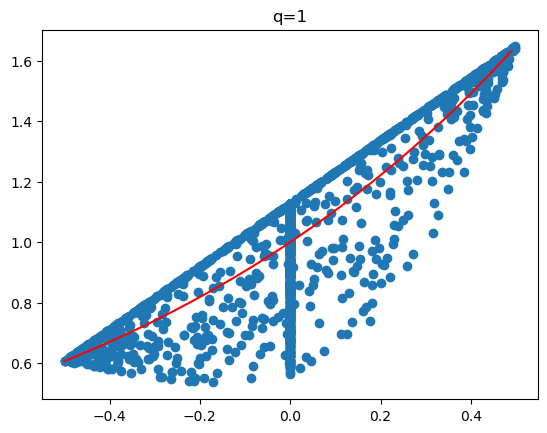

[0.99974845 0.99974845 0.99974845 0.99974845]


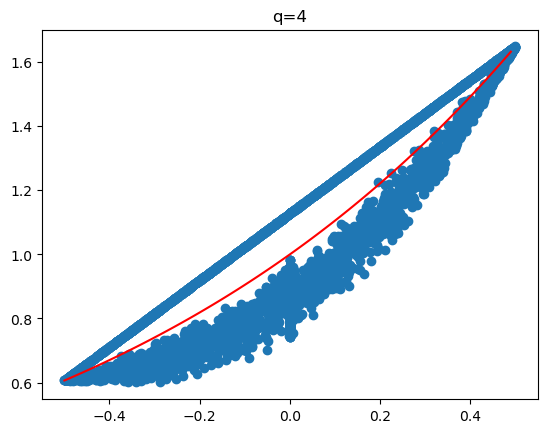

[1.00564414 1.00564414 1.00564414 1.00564414 1.00564414 1.00564414
 1.00564414 1.00564414 1.00564414 1.00564414]


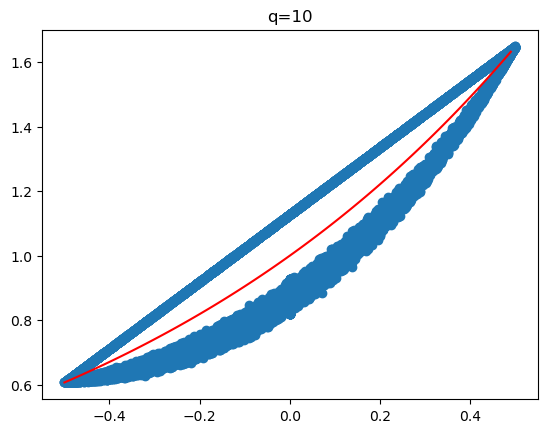

1
[0.97139516]


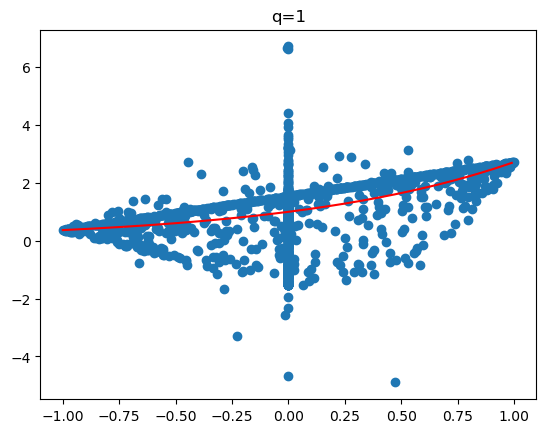

[0.99477085 0.99477085 0.99477085 0.99477085]


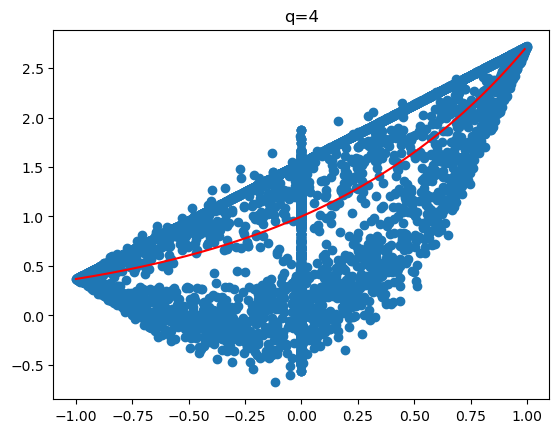

[1.02208241 1.02208241 1.02208241 1.02208241 1.02208241 1.02208241
 1.02208241 1.02208241 1.02208241 1.02208241]


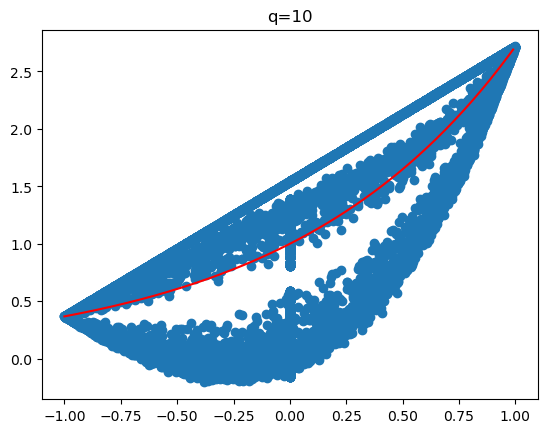

1.1
[1.04011437]


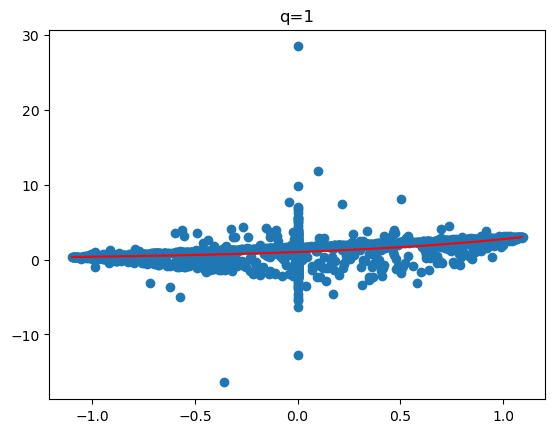

[1.04406334 1.04406334 1.04406334 1.04406334]


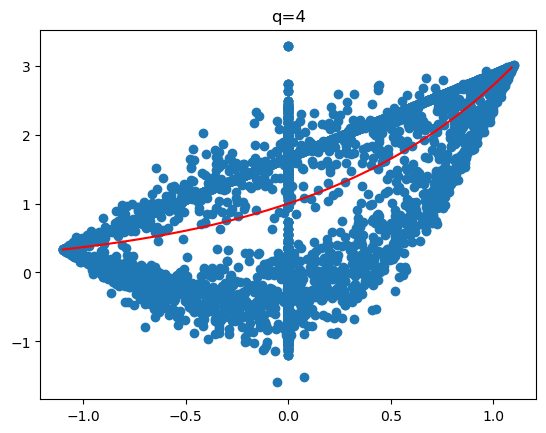

[1.01799117 1.01799117 1.01799117 1.01799117 1.01799117 1.01799117
 1.01799117 1.01799117 1.01799117 1.01799117]


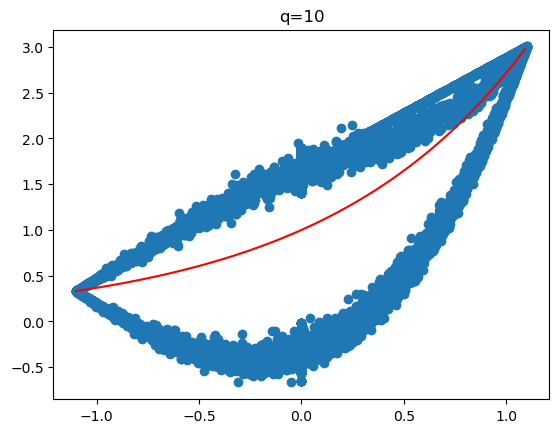

1.2
[0.92938475]


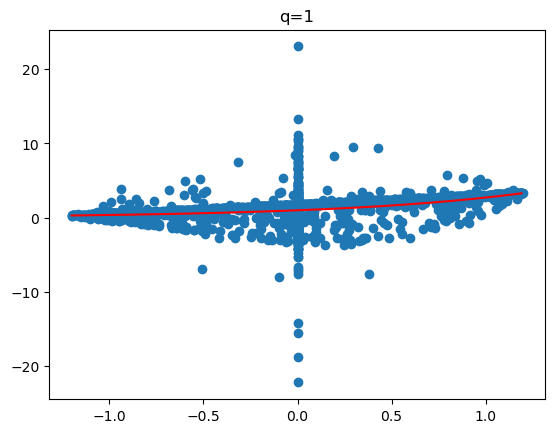

[1.05361096 1.05361096 1.05361096 1.05361096]


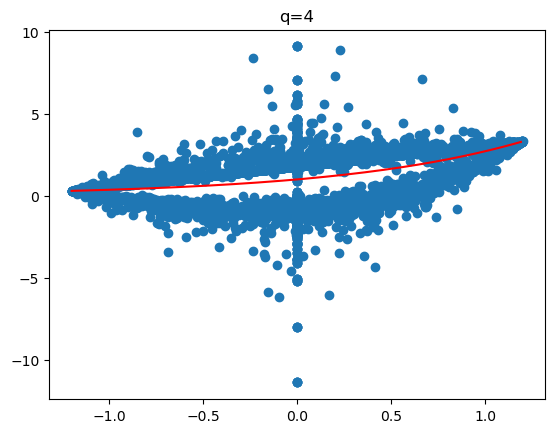

[1.00484392 1.00484392 1.00484392 1.00484392 1.00484392 1.00484392
 1.00484392 1.00484392 1.00484392 1.00484392]


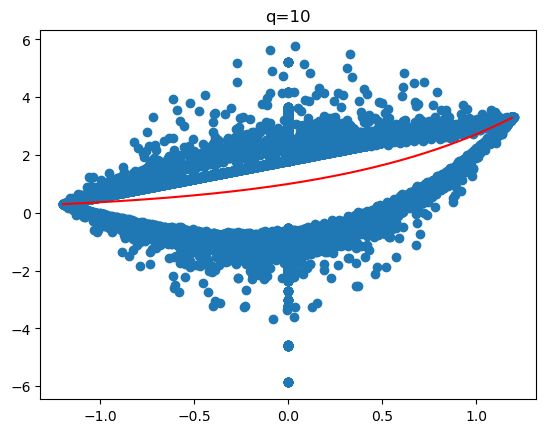

1.3
[0.97463109]


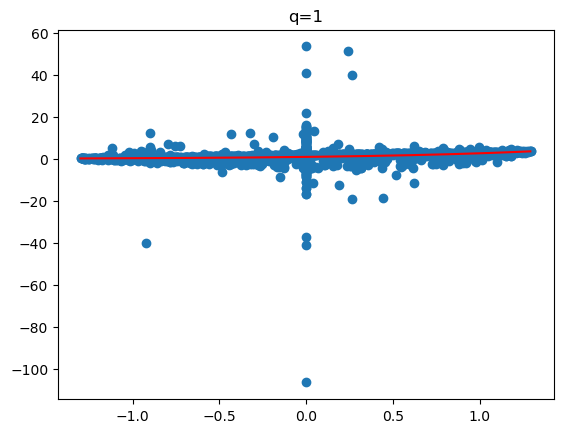

[0.96429886 0.96429886 0.96429886 0.96429886]


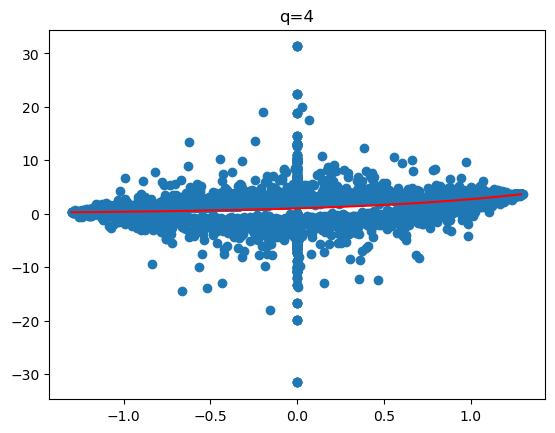

[0.9208046 0.9208046 0.9208046 0.9208046 0.9208046 0.9208046 0.9208046
 0.9208046 0.9208046 0.9208046]


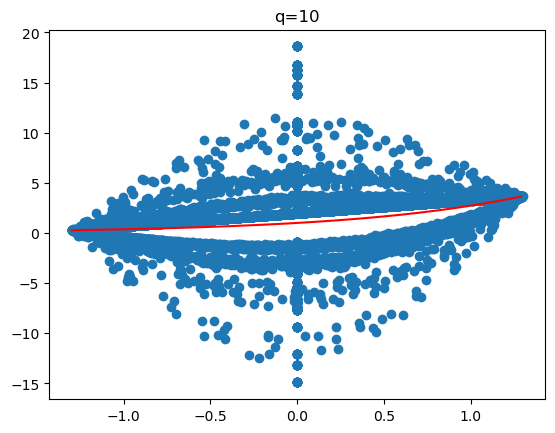

1.5
[2.27757733]


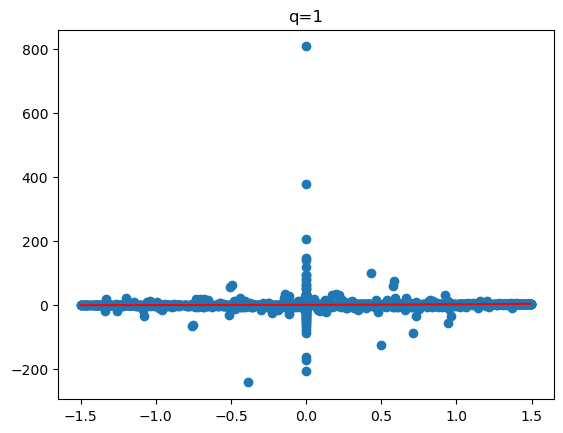

[-1.23579157 -1.23579157 -1.23579157 -1.23579157]


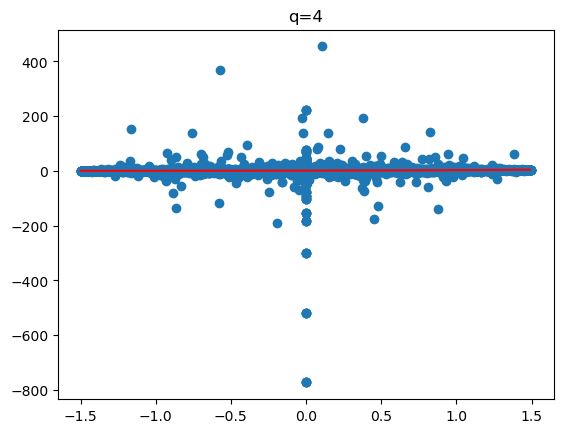

[0.18694132 0.18694132 0.18694132 0.18694132 0.18694132 0.18694132
 0.18694132 0.18694132 0.18694132 0.18694132]


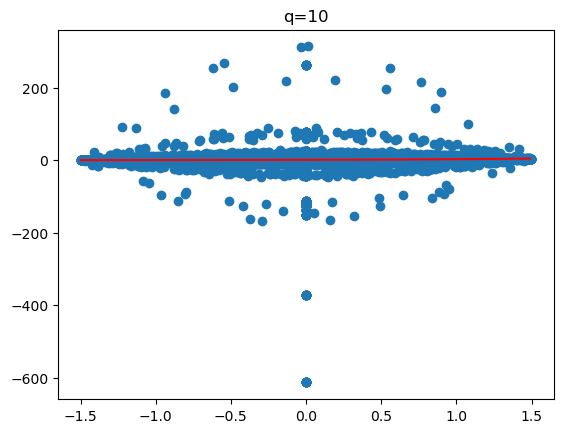

In [74]:
from random import random
from math import exp
import numpy as np
import matplotlib.pyplot as plt

def Pb0(t,b0,b1): return (b1-t)/(b1-b0)
def Pb1(t,b0,b1): return (t-b0)/(b1-b0)
def G(t,s,b0,b1): return -(b1-s)*(t-b0)/(b1-b0) if t<s else - (b1-t)*(s-b0)/(b1-b0) 

def pltaa(t,y0,y1,b0,b1,q):
    yy = np.array([y0,y1])
    points = []
    def X(T,y0,y1,b0,b1): 
        bb = np.diag([(b1-b0)/len(T)]*len(T))
        PP = np.array([[Pb0(t,b0,b1),Pb1(t,b0,b1)] for t in T])
        sol = PP @ yy
        l = 2 # russian roulette rate
        if random()*l<1: 
            SS = [b0+(random()+j)*(b1-b0)/len(T) for j in range(len(T))]
            GG = np.array([[G(t,S,b0,b1) for S in SS] for t in T]) 
            sol += l*GG @ bb @ X(SS,y0,y1,b0,b1)
        for t,soll in zip(T,sol):
            points.append((t,soll))
        return sol 

    def soltest(t,y0,y1,b0,b1,nsim = 10**3): 
        return sum(X([t]*q,y0,y1,b0,b1) for _ in range(nsim))/nsim
    print(soltest(t,y0,y1,b0,b1))
    x,y = zip(*points)
    plt.scatter(x,y)
    ll = np.arange(b0,b1,0.01)
    plt.plot(ll,np.exp(ll),color = "red")
    plt.title(f"q={q}")
    plt.show()

for k in [0.5,1,1.1,1.2,1.3,1.5]:
    print(k)
    pltaa(0,exp(-k),exp(k),-k,k,1)
    pltaa(0,exp(-k),exp(k),-k,k,4)
    pltaa(0,exp(-k),exp(k),-k,k,10)